Individuell uppgift – Hälsostudie

Introduktion
Du är dataanalytiker på ett forskningsinstitut. Du har fått tillgång till data från en hälsostudie här ovanför med information om deltagarnas ålder, kön, vikt, längd, blodtryck, kolesterolnivå, rökvanor och om de har en viss sjukdom.

Din uppgift är att analysera datan i Python och presentera dina resultat i en Jupyter Notebook.
 All kod, grafer och förklaringar ska finnas direkt i notebooken. Du lämnar in via GitHub i två delar:

Del 1 (vecka 45–46): Grundläggande analys och statistik – branch del1
Del 2 (vecka 47–48): Fördjupning och pipeline – branch del2

Dataset (CSV): health_study_dataset.csv
Kolumner: age (år), sex (M/F), height (cm), weight (kg), systolic_bp (mmHg), cholesterol (mmol/L), smoker (Yes/No), disease (0/1).

Del 1 – Grundläggande analys och statistik

För G ska du göra:

Beskrivande analys
Räkna ut medel, median, min och max för: age, weight, height, systolic_bp, cholesterol.
Skapa minst 3 olika grafer (t.ex. histogram över blodtryck, boxplot över vikt per kön, stapeldiagram över andelen rökare).
Simulering kopplad till caset (använd numpy.random + seed)
Beräkna andelen personer i datasetet som har sjukdomen.
Använd numpy för att simulera 1000 slumpade personer med samma sannolikhet för sjukdom.
Jämför den simulerade andelen med den verkliga andelen i datasetet.
Konfidensintervall
Beräkna ett konfidensintervall för medelvärdet av systolic_bp (t.ex. med normalapproximation eller bootstrap, som vi gått igenom på kursen).
Hypotesprövning
Testa hypotesen: ”Rökare har högre medel-blodtryck än icke-rökare.”
Använd en av metoderna vi gått igenom (t.ex. bootstrap eller enkel t-test-funktion).
Förklara kort resultatet i en markdown-ruta.

För VG ska du även göra:

Beräkna konfidensintervallet med två olika metoder (t.ex. normalapproximation och bootstrap) och jämför resultaten.
Gör en simulering för att undersöka hur säkert ditt hypotes­test är (t.ex. hur ofta testet hittar en skillnad när den finns → power).
Motivera dina metodval i markdown och hänvisa till dokumentation eller annan källa.

Inlämning Del 1: Notebook på GitHub i branch del1

In [1]:
import sys, os
sys.path.append(os.path.abspath(".."))

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("data/health_study_dataset.csv")

In [2]:
def get_stats(s):
    arr = np.array(s.dropna())
    return {
        'mean': np.mean(arr),
        'median': np.median(arr),
        'min': np.min(arr),
        'max': np.max(arr)
    }

stats_age = get_stats(df.age)
stats_weight = get_stats(df.weight)
stats_height = get_stats(df.height)
stats_systolic_bp = get_stats(df.systolic_bp)
stats_cholesterol = get_stats(df.cholesterol)


print(f"Age\nmean: {stats_age["mean"]}\nmedian: {stats_age["median"]}\nmin: {stats_age["min"]}\nmax: {stats_age["max"]}\n")
print(f"Weight\nmean: {stats_weight["mean"]}\nmedian: {stats_weight["median"]}\nmin: {stats_weight["min"]}\nmax: {stats_weight["max"]}\n")
print(f"Height\nmean: {stats_height["mean"]}\nmedian: {stats_height["median"]}\nmin: {stats_height["min"]}\nmax: {stats_height["max"]}\n")
print(f"Systolic BP\nmean: {stats_systolic_bp["mean"]}\nmedian: {stats_systolic_bp["median"]}\nmin: {stats_systolic_bp["min"]}\nmax: {stats_systolic_bp["max"]}\n")
print(f"Cholesterol\nmean: {stats_cholesterol["mean"]}\nmedian: {stats_cholesterol["median"]}\nmin: {stats_cholesterol["min"]}\nmax: {stats_cholesterol["max"]}\n")

Age
mean: 49.42625
median: 50.0
min: 18
max: 90

Weight
mean: 73.413
median: 73.2
min: 33.7
max: 114.4

Height
mean: 171.84925000000004
median: 171.35000000000002
min: 144.4
max: 200.4

Systolic BP
mean: 149.178625
median: 149.4
min: 106.8
max: 185.9

Cholesterol
mean: 4.92915
median: 4.97
min: 2.5
max: 7.88



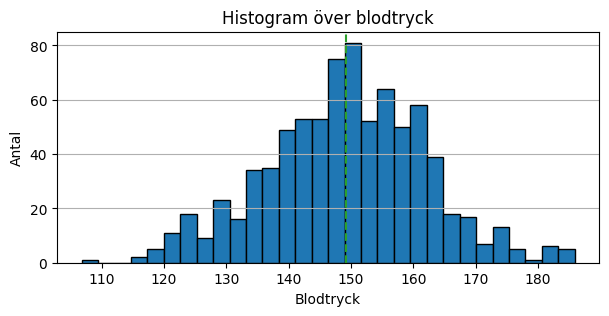

In [3]:
fig, ax = plt.subplots(figsize=(7,3))

data = df.systolic_bp

ax.hist(data, bins=30, edgecolor="black")
ax.axvline(stats_systolic_bp["mean"], color="tab:green", linestyle="--", label="Mean")
ax.set_title("Histogram över blodtryck")
ax.set_xlabel("Blodtryck")
ax.set_ylabel("Antal")
ax.grid(True, axis="y")